In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 20, 16
rcParams['figure.dpi'] = 300

import torch
from torch import nn
from torch import distributions
from torch.nn.parameter import Parameter

from sklearn import cluster, datasets, mixture
from sklearn.preprocessing import StandardScaler

import os 
import sys
sys.path.insert(0, os.path.join(os.getcwd(), ".."))

In [25]:
# train the model 
! python train.py

Loading the datasets...
- done.
Starting training for 100 epoch(s)
Epoch 1/100
100%|███████████████████████████████| 32/32 [00:00<00:00, 48.12it/s, loss=1.878]
- Train metrics: accuracy: 0.594 ; loss: 2.450
- Eval metrics : accuracy: 0.492 ; loss: 1.630
Checkpoint Directory exists! 
- Found new best accuracy
Epoch 2/100
100%|███████████████████████████████| 32/32 [00:00<00:00, 54.49it/s, loss=1.613]
- Train metrics: accuracy: 0.500 ; loss: 1.696
- Eval metrics : accuracy: 0.445 ; loss: 1.553
Checkpoint Directory exists! 
Epoch 3/100
100%|███████████████████████████████| 32/32 [00:00<00:00, 53.23it/s, loss=1.534]
- Train metrics: accuracy: 0.594 ; loss: 1.538
- Eval metrics : accuracy: 0.438 ; loss: 1.470
Checkpoint Directory exists! 
Epoch 4/100
100%|███████████████████████████████| 32/32 [00:00<00:00, 55.81it/s, loss=1.436]
- Train metrics: accuracy: 0.562 ; loss: 1.681
- Eval metrics : accuracy: 0.406 ; loss: 1.294
Checkpoint Directory exists! 
Epoch 5/100
100%|██████████████████████

100%|███████████████████████████████| 32/32 [00:00<00:00, 54.15it/s, loss=0.653]
- Train metrics: accuracy: 0.531 ; loss: 0.731
- Eval metrics : accuracy: 0.438 ; loss: 0.703
Checkpoint Directory exists! 
Epoch 39/100
100%|███████████████████████████████| 32/32 [00:00<00:00, 55.13it/s, loss=0.580]
- Train metrics: accuracy: 0.625 ; loss: 0.865
- Eval metrics : accuracy: 0.430 ; loss: 0.976
Checkpoint Directory exists! 
Epoch 40/100
100%|███████████████████████████████| 32/32 [00:00<00:00, 55.24it/s, loss=0.692]
- Train metrics: accuracy: 0.500 ; loss: 0.414
- Eval metrics : accuracy: 0.484 ; loss: 0.900
Checkpoint Directory exists! 
Epoch 41/100
100%|███████████████████████████████| 32/32 [00:00<00:00, 54.69it/s, loss=0.690]
- Train metrics: accuracy: 0.625 ; loss: 1.003
- Eval metrics : accuracy: 0.391 ; loss: 0.580
Checkpoint Directory exists! 
Epoch 42/100
100%|███████████████████████████████| 32/32 [00:00<00:00, 50.91it/s, loss=0.684]
- Train metrics: accuracy: 0.531 ; loss: 0.558


- Eval metrics : accuracy: 0.547 ; loss: 0.630
Checkpoint Directory exists! 
Epoch 76/100
100%|███████████████████████████████| 32/32 [00:00<00:00, 56.57it/s, loss=0.518]
- Train metrics: accuracy: 0.594 ; loss: 0.475
- Eval metrics : accuracy: 0.500 ; loss: 0.661
Checkpoint Directory exists! 
Epoch 77/100
100%|███████████████████████████████| 32/32 [00:00<00:00, 54.95it/s, loss=0.493]
- Train metrics: accuracy: 0.438 ; loss: 0.503
- Eval metrics : accuracy: 0.508 ; loss: 0.598
Checkpoint Directory exists! 
Epoch 78/100
100%|███████████████████████████████| 32/32 [00:00<00:00, 54.63it/s, loss=0.510]
- Train metrics: accuracy: 0.594 ; loss: 0.614
- Eval metrics : accuracy: 0.562 ; loss: 0.635
Checkpoint Directory exists! 
Epoch 79/100
100%|███████████████████████████████| 32/32 [00:00<00:00, 52.08it/s, loss=0.619]
- Train metrics: accuracy: 0.562 ; loss: 0.693
- Eval metrics : accuracy: 0.508 ; loss: 0.640
Checkpoint Directory exists! 
Epoch 80/100
100%|███████████████████████████████| 

In [26]:
# retrieve saved model 
import model.net as net
nets = lambda: nn.Sequential(nn.Linear(2, 256), nn.LeakyReLU(), nn.Linear(256, 256), nn.LeakyReLU(), nn.Linear(256, 2), nn.Tanh()) # net s
nett = lambda: nn.Sequential(nn.Linear(2, 256), nn.LeakyReLU(), nn.Linear(256, 256), nn.LeakyReLU(), nn.Linear(256, 2)) # net t
masks = torch.from_numpy(np.array([[0, 1], [1, 0]] * 3).astype(np.float32)) # 6x2 matrix. len(masks) = 6 = num subblocks.
prior = distributions.MultivariateNormal(torch.zeros(2), torch.eye(2))      # so we have a total of 3 neural blocks (see fig. 1 of boltzmann generators paper)
model = net.RealNVP(nets, nett, masks, prior)
model.load_state_dict(torch.load('mysave.pt'))
#model.eval()

<All keys matched successfully>

Text(0.5, 1.0, '$X = g(z)$')

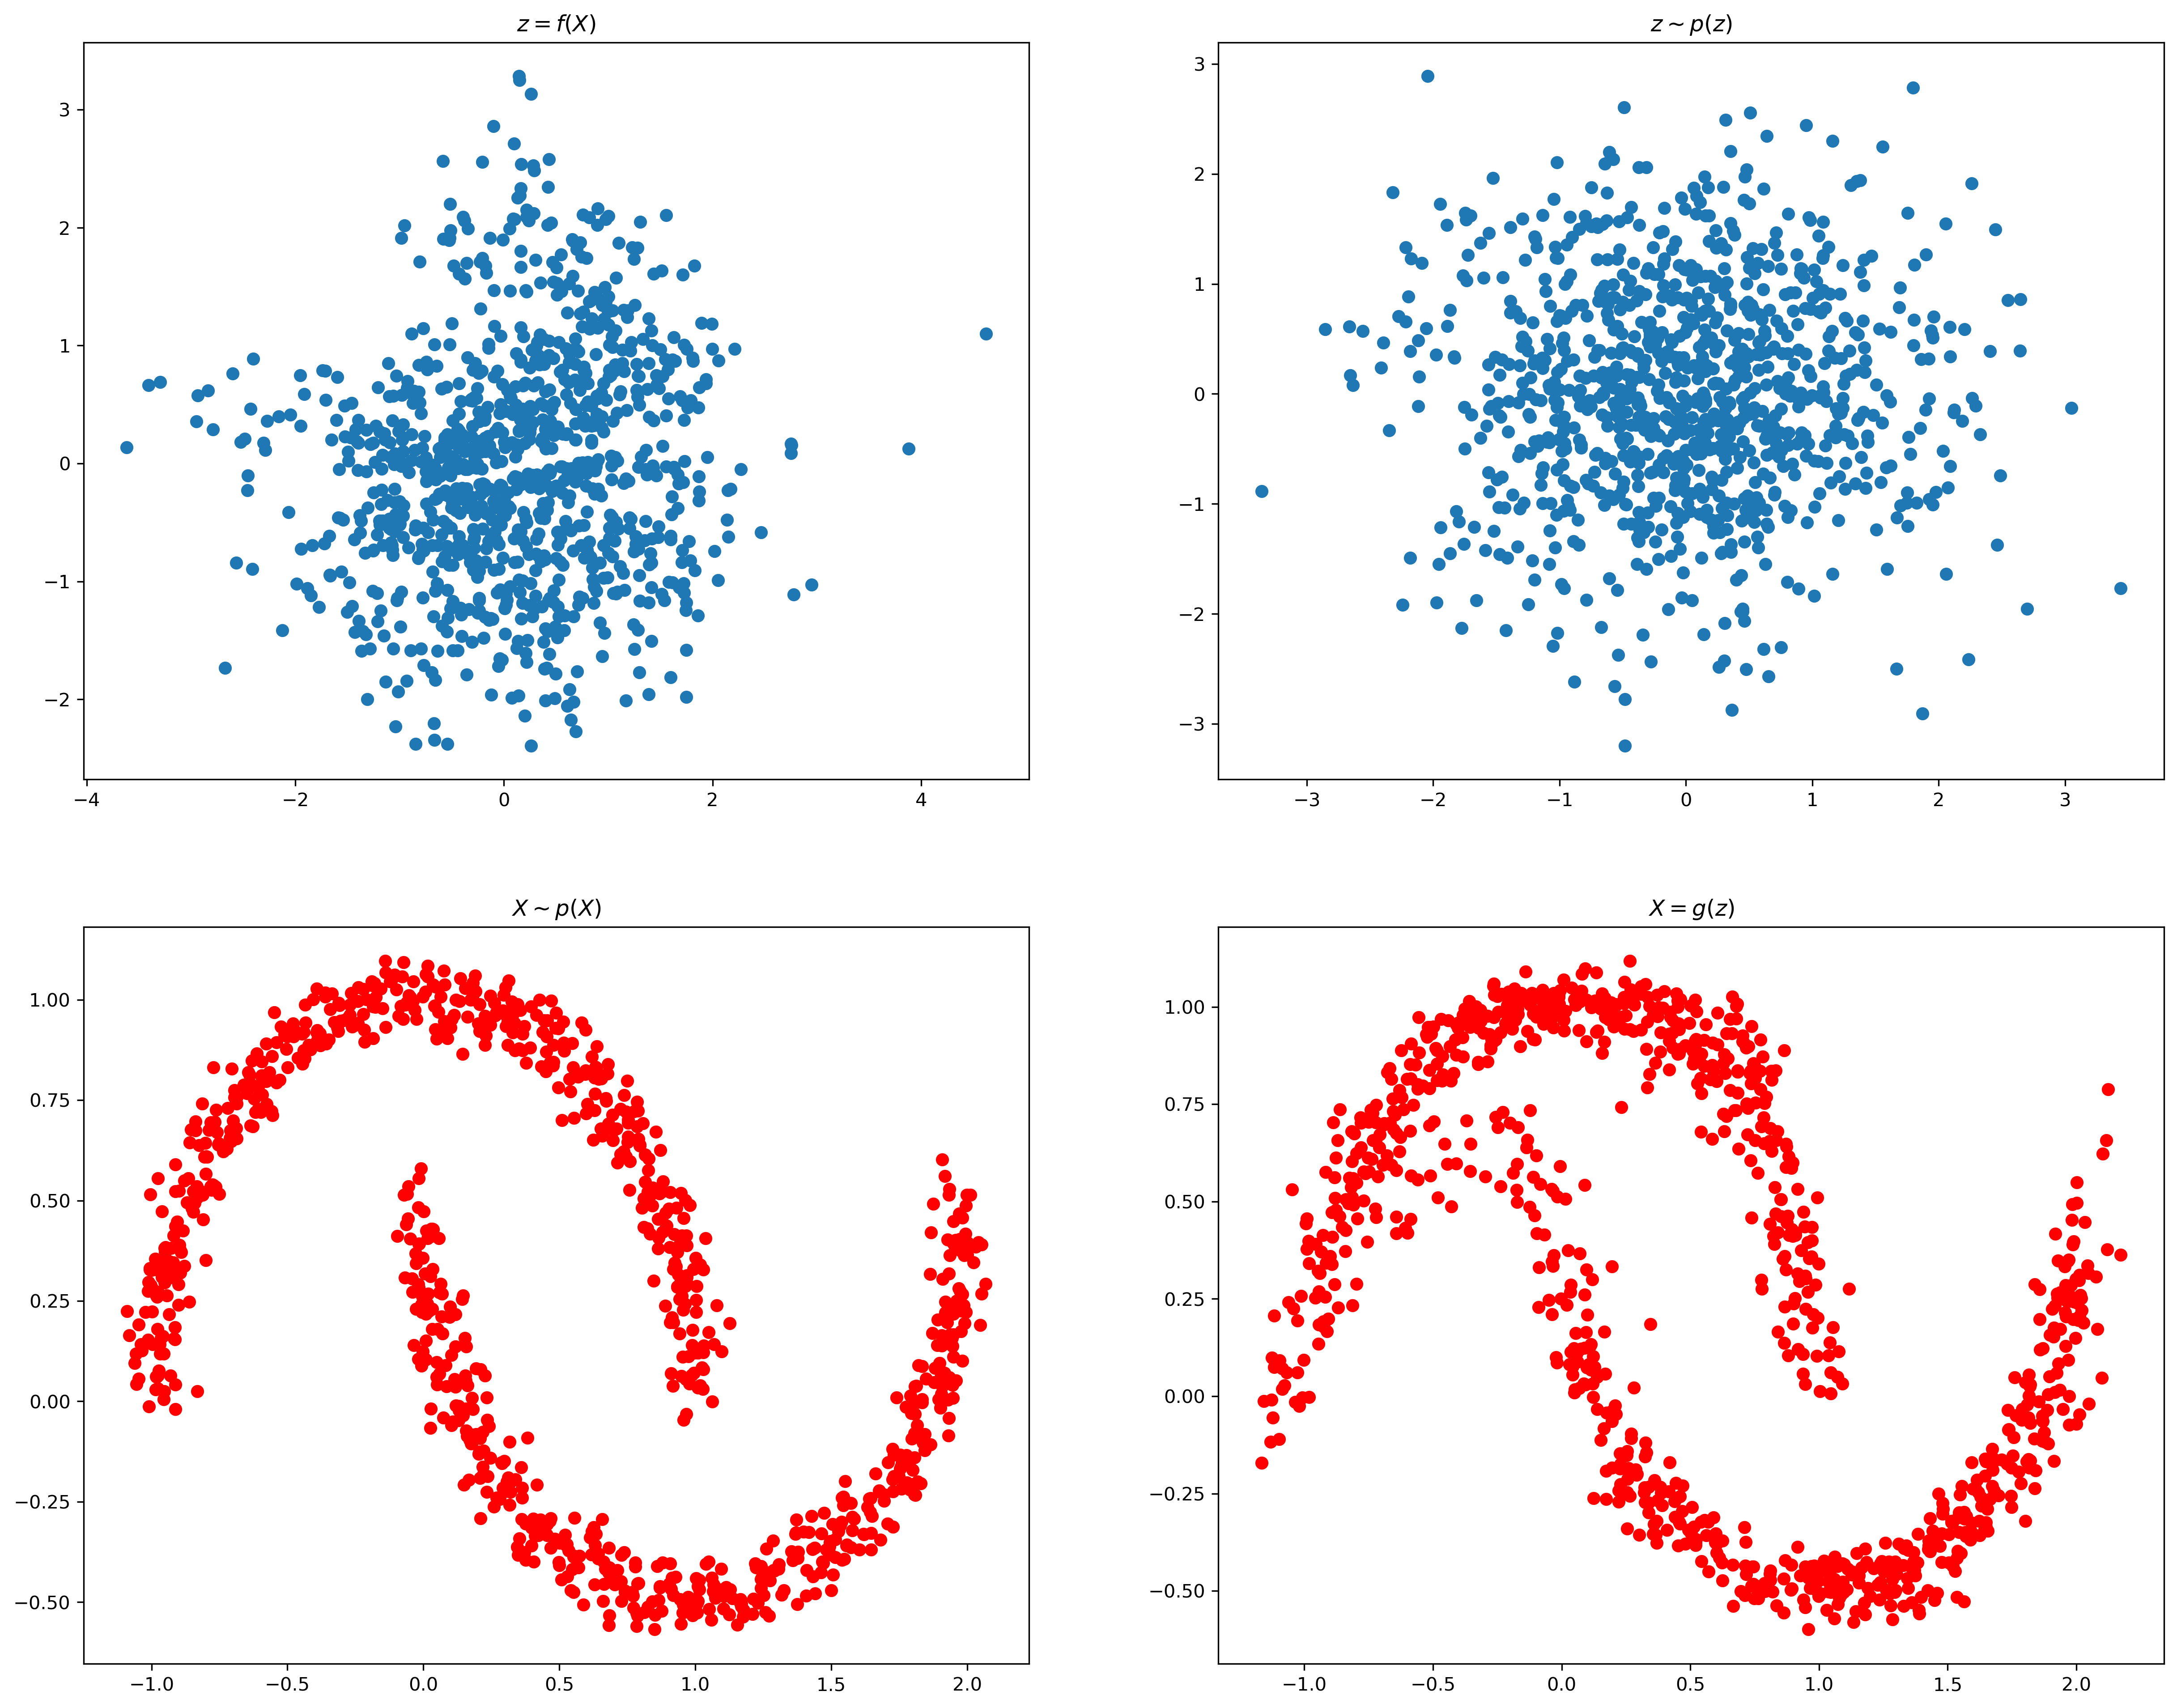

In [27]:
noisy_moons = datasets.make_moons(n_samples=1000, noise=.05)[0].astype(np.float32)
z = model.f(torch.from_numpy(noisy_moons))[0].detach().numpy()
plt.subplot(221)
plt.scatter(z[:, 0], z[:, 1])
plt.title(r'$z = f(X)$')

z = np.random.multivariate_normal(np.zeros(2), np.eye(2), 1000)
plt.subplot(222)
plt.scatter(z[:, 0], z[:, 1])
plt.title(r'$z \sim p(z)$')

plt.subplot(223)
x = datasets.make_moons(n_samples=1000, noise=.05)[0].astype(np.float32)
plt.scatter(x[:, 0], x[:, 1], c='r')
plt.title(r'$X \sim p(X)$')

plt.subplot(224)
x = model.sample(1000).detach().numpy()
plt.scatter(x[:, 0, 0], x[:, 0, 1], c='r')
plt.title(r'$X = g(z)$')